# INDENG 243 Project : Airbnb Recommendation System - Module 1

## 1 Data Collection

In the beginning stage of data colletion, we wished to extract data directly from Airbnb official website using API. But Airbnb now is not accepting new access requests for their API. So we decided to use the package Airbnb Scraper from Apify (https://console.apify.com/actors/GsNzxEKzE2vQ5d9HN/console), a cloud platform for web scraping, to obtain our raw data.

We first manually inputted the top 50 most visited cities in the world selected by GoVisity (https://govisity.com/most-visited-cities-in-the-world/). Since Airbnb shut their business in mainland China, we removed three mainland China cities (Shenzhen, Guangzhou, Shanghai) from the list. And we limited the Airbnb number under 250 in each city dataset. Furthermore, we selected the Airbnb features we think are crucial for building our recommandation system. Finally, we integrated all 47 cities data into one complete massive dataset.


## 2 Data Cleaning
In the data cleaning process for our project, we began by preparing the dataset, addressing missing values, and ensuring consistency. We first dropped redundant columns and converted categorical variables like BedLabel and BedroomLabel into numerical data to enhance compatibility with machine learning algorithms. The dataframe was reshaped by creating dummy variables to represent the presence or absence of specific amenities. We also selected the most frequent listing amenities as variables to simplify our model.

### 2.1 Prepare dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv('Airbnb_dataset.csv')
df.head()

<ipython-input-3-50cfeb3cfd83>:1: DtypeWarning: Columns (14,258) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Airbnb_dataset.csv')


,url,name,stars,pricing/rate/amount,address,city,country,roomTypeCategory,bedroomLabel,bedLabel,...,listingAmenities/58/isPresent,listingAmenities/58/name,listingAmenities/59/description,listingAmenities/59/id,listingAmenities/59/isPresent,listingAmenities/59/name,listingAmenities/60/description,listingAmenities/60/id,listingAmenities/60/isPresent,listingAmenities/60/name
0,https://www.airbnb.com/rooms/53119647,Marmar 50,NaN,95154,"Banting, Selangor, Malaysia",Banting,Malaysia,private_room,2 bedrooms,1 bed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.airbnb.com/rooms/54011459,Atmosphere 2-Bedroom @ Genting Highlands,4.5,21145,"Genting Highlands, Pahang, Malaysia",Genting Highlands,Malaysia,entire_home,2 bedrooms,3 beds,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.airbnb.com/rooms/40369592,1-Bedroom Deluxe Twin @ Somerset Kuala Lumpur,NaN,8636,"Kuala Lumpur, Wilayah Persekutuan Kuala Lumpur...",Kuala Lumpur,Malaysia,private_room,1 bedroom,2 beds,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.airbnb.com/rooms/40369982,3-Bedroom Premier @ Somerset Kuala Lumpur,NaN,8636,"Kuala Lumpur, Wilayah Persekutuan Kuala Lumpur...",Kuala Lumpur,Malaysia,private_room,3 bedrooms,4 beds,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.airbnb.com/rooms/25529382,<02> Bali Retreat @ Studio 14 Shah Alam,5.0,3142,"Shah Alam, Selangor, Malaysia",Shah Alam,Malaysia,entire_home,Studio,1 bed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.2 Drop redundant columns
To streamline our data and improve processing efficiency, we dropped redundant columns such as text descriptions and ids of listing amenities and house rules. This allows us to eliminate unnecessary information that wouldn't significantly contribute to our recommendation model.

In [ ]:
# drop listingAmenities/description and listingAmenities/id
columns_to_drop = [col for col in df.columns if 'description' in col.lower() or 'id' in col.lower()]
df.drop(columns = columns_to_drop, inplace=True)

# drop text description of house rules
df.drop(columns = ['guestControls/structuredHouseRules/2', 'guestControls/structuredHouseRulesWithTips/3/text'], inplace = True)
df.head()

,url,name,stars,pricing/rate/amount,address,city,country,roomTypeCategory,bedroomLabel,bedLabel,...,listingAmenities/56/isPresent,listingAmenities/56/name,listingAmenities/57/isPresent,listingAmenities/57/name,listingAmenities/58/isPresent,listingAmenities/58/name,listingAmenities/59/isPresent,listingAmenities/59/name,listingAmenities/60/isPresent,listingAmenities/60/name
0,https://www.airbnb.com/rooms/53119647,Marmar 50,NaN,95154,"Banting, Selangor, Malaysia",Banting,Malaysia,private_room,2 bedrooms,1 bed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.airbnb.com/rooms/54011459,Atmosphere 2-Bedroom @ Genting Highlands,4.5,21145,"Genting Highlands, Pahang, Malaysia",Genting Highlands,Malaysia,entire_home,2 bedrooms,3 beds,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.airbnb.com/rooms/40369592,1-Bedroom Deluxe Twin @ Somerset Kuala Lumpur,NaN,8636,"Kuala Lumpur, Wilayah Persekutuan Kuala Lumpur...",Kuala Lumpur,Malaysia,private_room,1 bedroom,2 beds,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.airbnb.com/rooms/40369982,3-Bedroom Premier @ Somerset Kuala Lumpur,NaN,8636,"Kuala Lumpur, Wilayah Persekutuan Kuala Lumpur...",Kuala Lumpur,Malaysia,private_room,3 bedrooms,4 beds,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.airbnb.com/rooms/25529382,<02> Bali Retreat @ Studio 14 Shah Alam,5.0,3142,"Shah Alam, Selangor, Malaysia",Shah Alam,Malaysia,entire_home,Studio,1 bed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.3 Convert categorical data into Numerical data
We converted categorical variables like BedLabel, BedroomLabel, and BathroomLabel into numerical representations, paving the way for more robust model training.

In [ ]:
df['bedroomLabel'] = df['bedroomLabel'].replace("studio", "0").str.extract('(\d+)').astype(float)
df['bedLabel'] = df['bedLabel'].str.extract('(\d+)').astype(float)
df['bathroomLabel'] = df['bathroomLabel'].str.extract(r'(\d+\.\d+|\d+)').astype(float)
df['url'] = df['url'].astype(str)
df['url'] = df['url'].str.extract(r'/rooms/(\d+)')
df['url'] = df['url'].astype(int)

### 2.4 Reshape dataframe
We created dummy variables to indicate whether a house provides specific amenities. This not only simplifies our dataset structure but also allows us to capture the presence or absence of certain features, providing valuable insights for our recommendation engine. For example, for the "TV" column, the value will be 1 if the airbnb provides TV. Otherwise, the value will be 0.

In [ ]:
df = pd.melt(df, id_vars=df.columns[0:20], value_vars=df.columns[20:], var_name='listingAmenities', value_name='amenities').sort_values(['url','listingAmenities'])
df = df.dropna(subset = ['amenities'])
df.reset_index(drop =True, inplace = True)

df = df.drop(df[df.amenities == False].index + 1)
df = df.drop(df[df.amenities == False].index)
df = df.drop(df[df.amenities == True].index)
df.drop(columns = ['listingAmenities'], inplace = True)

In [ ]:
amenity_dummies = pd.get_dummies(df['amenities'])
df = pd.concat([df, amenity_dummies], axis=1)
df = df.groupby('url').max()
df.head()

,name,stars,pricing/rate/amount,address,city,country,roomTypeCategory,bedroomLabel,bedLabel,bathroomLabel,...,Stove,TV,Table corner guards,Toaster,Trash compactor,Washer,Waterfront,Wifi,Window guards,Wine glasses
url,,,,,,,,,,,,,,,,,,,,,
39794,MODERN 3 BHK APARTMENT BEST PLACE,4.63,181,"New Delhi, DL, India",New Delhi,India,entire_home,3.0,3.0,3.0,...,1,1,0,0,0,1,0,1,0,0
44931,Rooftop Dipping Pool Hse w/ Stay-in male Caret...,4.71,227,"Kuala Lumpur, WP Kuala Lumpur, Malaysia",Kuala Lumpur,Malaysia,entire_home,5.0,7.0,6.0,...,1,0,0,0,0,1,0,1,0,1
60300,Enjoy apartment luxury in Rome,4.93,964,"Rome, Lazio, Italy",Roma,Italy,entire_home,5.0,9.0,5.0,...,0,1,0,0,0,1,0,1,0,0
69022,Design Penthouse with amazing view in Gangnam,4.87,320,"Gangnam-gu, Seoul, South Korea",Gangnam-gu,South Korea,entire_home,2.0,5.0,2.5,...,1,1,0,0,0,1,0,1,0,0
75474,"Elegant, historic villa, air-con, pool, spa, bbq",NaN,2157,"Rome, Lazio, Italy",Rome,Italy,entire_home,6.0,6.0,6.5,...,1,1,0,1,0,1,0,1,0,0


### 2.5 Select the most frequent amenities as variables
In order to focus on the most relevant features, we selected the most frequent listing amenities as variables. By doing so, we aim to prioritize the elements that have a significant impact on user preferences, ensuring our recommendations align closely with what users are looking for in an Airbnb listing.

In [ ]:
# top 40 amenities
column_sum = df.iloc[:, 20:].sum().sort_values(ascending=False)
column_sum.head(40)

Wifi                          9883
Essentials                    9441
TV                            9391
Kitchen                       9057
Air conditioning              8678
Hangers                       8653
Hair dryer                    8503
Shampoo                       8035
Iron                          7936
Washer                        7850
Hot water                     7820
Refrigerator                  7304
Heating                       7213
Dishes and silverware         6965
Smoke alarm                   6483
Cooking basics                6458
Fire extinguisher             6269
Bed linens                    6179
Microwave                     5912
Free parking on premises      5852
Stove                         5602
Long term stays allowed       5266
Private entrance              5164
Dryer                         5156
Coffee maker                  5079
Dedicated workspace           5068
First aid kit                 5034
Patio or balcony              4909
Carbon monoxide alar

In [ ]:
# drop the rest amenities
columns79 = column_sum.tail(79).index
df = df.drop(columns = columns79)

# drop nan
df = df.dropna()

# final dataset used in project
df

,name,stars,pricing/rate/amount,address,city,country,roomTypeCategory,bedroomLabel,bedLabel,bathroomLabel,...,Patio or balcony,Pool,Private entrance,Refrigerator,Shampoo,Smoke alarm,Stove,TV,Washer,Wifi
url,,,,,,,,,,,,,,,,,,,,,
39794,MODERN 3 BHK APARTMENT BEST PLACE,4.63,181,"New Delhi, DL, India",New Delhi,India,entire_home,3.0,3.0,3.0,...,0,0,0,1,1,1,1,1,1,1
44931,Rooftop Dipping Pool Hse w/ Stay-in male Caret...,4.71,227,"Kuala Lumpur, WP Kuala Lumpur, Malaysia",Kuala Lumpur,Malaysia,entire_home,5.0,7.0,6.0,...,0,1,0,1,1,0,1,0,1,1
60300,Enjoy apartment luxury in Rome,4.93,964,"Rome, Lazio, Italy",Roma,Italy,entire_home,5.0,9.0,5.0,...,0,0,0,1,1,0,0,1,1,1
69022,Design Penthouse with amazing view in Gangnam,4.87,320,"Gangnam-gu, Seoul, South Korea",Gangnam-gu,South Korea,entire_home,2.0,5.0,2.5,...,0,0,0,1,1,1,1,1,1,1
81049,Lux. 2BR Apart. Berlin Mitte -Licensed!,4.95,197,"Berlin, Germany",Berlin,Germany,entire_home,2.0,3.0,1.0,...,0,0,0,0,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039893729808217100,Luxury apartment #6,5.00,179,"Riyadh, Riyadh Province, Saudi Arabia",Riyadh,Saudi Arabia,entire_home,2.0,3.0,2.0,...,0,0,0,0,0,1,0,1,0,1
1047588866474589600,S20-豪华套房 靠近BTS Ekamai /无边泳池/免费停车,5.00,113,"Khet Khlong Toei, Krung Thep Maha Nakhon, Thai...",Khet Khlong Toei,Thailand,entire_home,2.0,2.0,1.0,...,0,1,0,1,1,1,1,1,1,1
1049840170019325800,Beautiful home with gazebo,5.00,19,"Jaipur, Rajasthan, India",Jaipur,India,entire_home,1.0,0.0,0.0,...,1,0,0,1,0,0,0,1,0,1


## 3 Limitations of dataset



*   Convenience Information:

    The dataset may lack details about the convenience of the Airbnb listings, such as proximity to public transportation, nearby amenities, or accessibility features. This absence might affect the completeness of the user experience information.
*   Neighborhood Insights:
    
    Information about the specific neighborhood or locality, including its character, safety reputation, and nearby attractions, is not apparent in the dataset. Neighborhood context is often crucial for users when choosing an Airbnb listing.
*   Additional Amenities:

    There are a lot of amenities that are not be captured in the dataset. These omissions could impact the accuracy of recommendations.
*   Temporal Dynamics:

    The dataset may lack information on temporal dynamics, such as seasonal variations in pricing or the availability of listings during peak travel times. Considering these aspects could enhance the model's adaptability to changing user needs.



## 4 Description of the data

* **name**:
Represents the name of the Airbnb listing, providing a brief identifier for each property.
* **stars**:
Indicates the star rating associated with the listing, reflecting the overall satisfaction or quality of the property based on user reviews.
* **pricing/rate/amount**:
Describes the pricing structure or rate associated with the Airbnb listing, providing information on the cost for renting the property.
* **address**:
Specifies the physical address of the Airbnb listing, aiding users in identifying the location of the property.
* **city**:
Denotes the city where the Airbnb property is situated, offering insight into the geographical context of the listing.
* **country**:
Represents the country in which the Airbnb property is located, providing a broader geographical context for the listing.
* **roomTypeCategory**:
Categorizes the type of room available for rent, such as entire home/apartment, private room, or shared room.
* **bedroomLabel**:
Assigns a label or category to the number of bedrooms in the Airbnb listing, aiding users in understanding the property's accommodation capacity.
* **bedLabel**:
Assigns a label or category to the type of beds available in the Airbnb listing, offering information about the sleeping arrangements.
* **bathroomLabel**:
Categorizes the number of bathrooms in the Airbnb listing, providing details about the available restroom facilities.
* **Wifi, TV, Washer...(Amenities)**:
Includes a series of binary variables representing various amenities offered by the Airbnb listing. Each amenity is represented by a binary value (1 for presence, 0 for absence).

## 5 Data Visualization

### 5.1 Rating histogram

This histogram helps to understand the distribution of airbnb ratings (stars) in your dataset. It gives a quick overview of the quality of Airbnb available and can inform users about the typical level of service they can expect.

In [ ]:
# Define the intervals
intervals = [2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2]

# Create a new column with interval labels
df['interval'] = pd.cut(df['stars'], bins=intervals, right=False)

# Group by intervals and count the number of stars in each interval
interval_counts = df['interval'].value_counts().sort_index()

# Create a new DataFrame to display the results
result_df = pd.DataFrame({'Interval': interval_counts.index, 'Count': interval_counts.values})

# Print the result table
print(result_df)

      Interval  Count
0   [2.5, 2.6)      0
1   [2.6, 2.7)      1
2   [2.7, 2.8)      1
3   [2.8, 2.9)      0
4   [2.9, 3.0)      0
5   [3.0, 3.1)      5
6   [3.1, 3.2)      0
7   [3.2, 3.3)      5
8   [3.3, 3.4)      5
9   [3.4, 3.5)      5
10  [3.5, 3.6)     10
11  [3.6, 3.7)     24
12  [3.7, 3.8)     22
13  [3.8, 3.9)     21
14  [3.9, 4.0)      5
15  [4.0, 4.1)     77
16  [4.1, 4.2)     62
17  [4.2, 4.3)    104
18  [4.3, 4.4)    166
19  [4.4, 4.5)    195
20  [4.5, 4.6)    409
21  [4.6, 4.7)    645
22  [4.7, 4.8)    882
23  [4.8, 4.9)   1341
24  [4.9, 5.0)   1164
25  [5.0, 5.1)   1008
26  [5.1, 5.2)      0


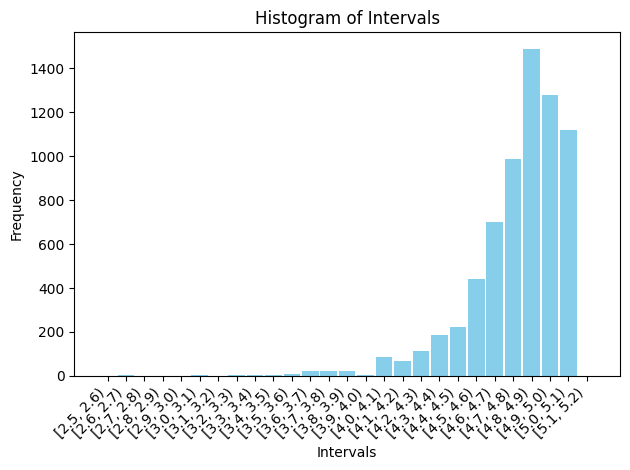

In [ ]:
import matplotlib.pyplot as plt

# Your data
intervals = ["[2.5, 2.6)", "[2.6, 2.7)", "[2.7, 2.8)", "[2.8, 2.9)", "[2.9, 3.0)",
             "[3.0, 3.1)", "[3.1, 3.2)", "[3.2, 3.3)", "[3.3, 3.4)", "[3.4, 3.5)",
             "[3.5, 3.6)", "[3.6, 3.7)", "[3.7, 3.8)", "[3.8, 3.9)", "[3.9, 4.0)",
             "[4.0, 4.1)", "[4.1, 4.2)", "[4.2, 4.3)", "[4.3, 4.4)", "[4.4, 4.5)",
             "[4.5, 4.6)", "[4.6, 4.7)", "[4.7, 4.8)", "[4.8, 4.9)", "[4.9, 5.0)",
             "[5.0, 5.1)", "[5.1, 5.2)"]

counts = [0, 2, 1, 1, 0, 5, 0, 6, 6, 5, 10, 24, 24, 22, 5, 85, 68, 112, 185, 221, 442, 701, 988, 1490, 1277, 1119, 0]

# Plotting the histogram
plt.bar(intervals, counts, width=0.9, color='skyblue')
plt.xlabel('Intervals')
plt.ylabel('Frequency')
plt.title('Histogram of Intervals')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### 5.2 Number of Airbnb in each country/region

It helps showcase the distribution of Airbnb across different regions. This can help users explore options in specific regions and make decisions based on their preferred locations.

In [ ]:
#frequency table(country)
df = pd.read_csv('Airbnb_dataset.csv')
unique_regions = df['country'].unique()
region_counts = df['country'].value_counts()
print(region_counts)

United States           1250
India                   1103
Thailand                1000
Italy                    749
Turkey                   500
Spain                    500
Japan                    500
Vietnam                  500
Malaysia                 489
Saudi Arabia             271
Indonesia                257
Singapore                254
Netherlands              250
Czechia                  250
United Arab Emirates     250
Ireland                  250
Germany                  250
United Kingdom           250
France                   250
South Korea              250
Greece                   250
Mexico                   250
Egypt                    250
Austria                  250
Taiwan                   249
Hong Kong                 53
Macau                     30
Switzerland                1
Seychelles                 1
Name: country, dtype: int64


<ipython-input-12-5351ad42d5f9>:2: DtypeWarning: Columns (14,258) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Airbnb_dataset.csv')


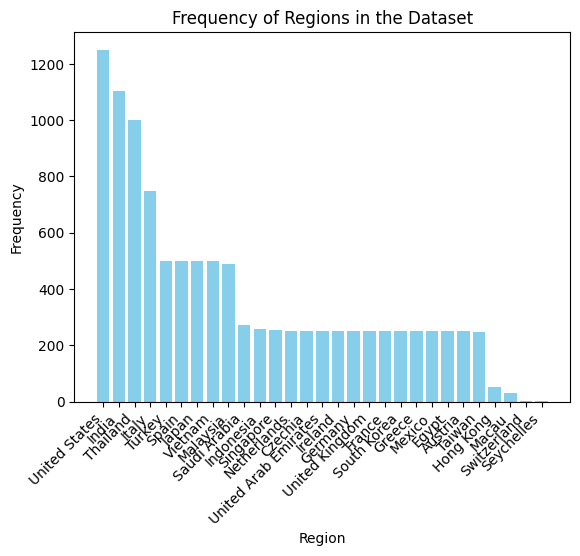

In [ ]:
# pip install matplotlib
import matplotlib.pyplot as plt

# Create a bar chart
plt.bar(region_counts.index, region_counts.values, color='skyblue')

# Set labels and title
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Frequency of Regions in the Dataset')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

### 5.3 Average ratings by region

It presents the average ratings of Airbnb in different regions. This can assist users in gauging the overall satisfaction level in specific locations.

In [ ]:
stars_table = pd.pivot_table(df, values='stars', index='country', aggfunc='mean')

# Display the ratings table
print(stars_table)

                         stars
country                       
Austria               4.790611
Czechia               4.727760
Egypt                 4.779664
France                4.792920
Germany               4.798814
Greece                4.819013
Hong Kong             4.780000
India                 4.682568
Indonesia             4.860735
Ireland               4.817316
Italy                 4.757756
Japan                 4.778838
Macau                 4.808000
Malaysia              4.705504
Mexico                4.807935
Netherlands           4.785561
Saudi Arabia          4.720881
Seychelles            5.000000
Singapore             4.711758
South Korea           4.846720
Spain                 4.715937
Switzerland           5.000000
Taiwan                4.799848
Thailand              4.756803
Turkey                4.739132
United Arab Emirates  4.676755
United Kingdom        4.723986
United States         4.804178
Vietnam               4.759771


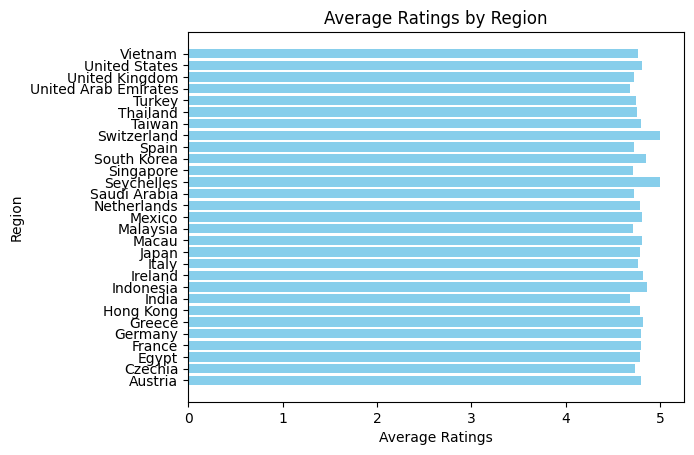

In [ ]:
plt.barh(stars_table.index, stars_table['stars'], color='skyblue')
plt.ylabel('Region')
plt.xlabel('Average Ratings')
plt.title('Average Ratings by Region')
plt.show()

### 5.4 Average price by region

 This could guide them to make accommodation decisions based on their budget preferences.

In [ ]:
pricing_table = pd.pivot_table(df, values='pricing/rate/amount', index='country', aggfunc='mean')

# Display the pricing table
print(pricing_table)

                      pricing/rate/amount
country                                  
Austria                        399.880000
Czechia                        954.932000
Egypt                          301.908000
France                        3697.952000
Germany                       2647.576000
Greece                        3281.112000
Hong Kong                      655.056604
India                          181.142339
Indonesia                     3274.793774
Ireland                        724.048000
Italy                         3969.444593
Japan                          523.846000
Macau                          309.333333
Malaysia                      1023.725971
Mexico                        1962.712000
Netherlands                   3867.412000
Saudi Arabia                   299.428044
Seychelles                     217.000000
Singapore                      647.893701
South Korea                   1504.652000
Spain                         1572.252000
Switzerland                   3348

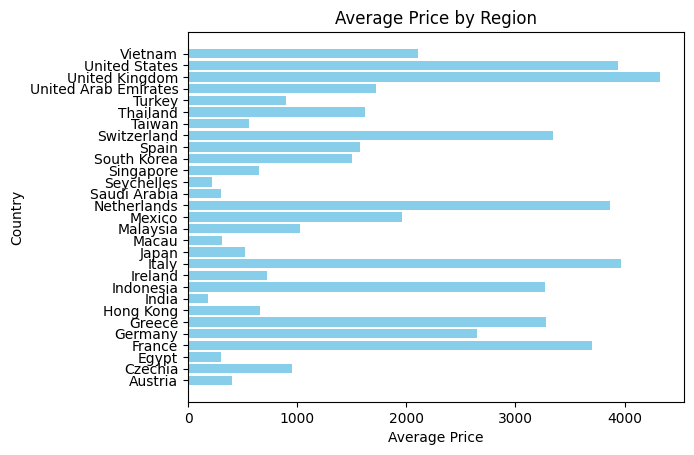

In [ ]:
plt.barh(pricing_table.index, pricing_table['pricing/rate/amount'], color='skyblue')
plt.ylabel('Country')
plt.xlabel('Average Price')
plt.title('Average Price by Region')
plt.show()

### 5.5 Box plot of pricing

lt provides insights into the affordability of accommodations in various locations.

In [ ]:
pricing_table = pd.pivot_table(df, values='pricing/rate/amount', index='country', aggfunc=list)

# Display the pricing table
print(pricing_table)

                                                    pricing/rate/amount
country                                                                
Austria               [6496, 3790, 962, 936, 800, 1082, 1083, 1408, ...
Czechia               [86620, 8714, 3568, 5414, 1081, 541, 2166, 987...
Egypt                 [6506, 9998, 1800, 2200, 2500, 2640, 4311, 501...
France                [97447, 57645, 46404, 12993, 3248, 8909, 4006,...
Germany               [86620, 86620, 86620, 27069, 27069, 27069, 163...
Greece                [86918, 15158, 8476, 6930, 8476, 8662, 8662, 2...
Hong Kong             [19184, 70, 256, 92, 457, 270, 61, 187, 298, 1...
India                 [1677, 1928, 603, 1506, 1078, 603, 890, 1198, ...
Indonesia             [10570, 6349, 2700, 1486, 1243, 614, 10570, 31...
Ireland               [9550, 1700, 1700, 969, 1700, 436, 478, 399, 7...
Italy                 [97447, 17970, 22738, 16371, 22738, 22738, 163...
Japan                 [19286, 800, 426, 470, 392, 511, 546, 419,

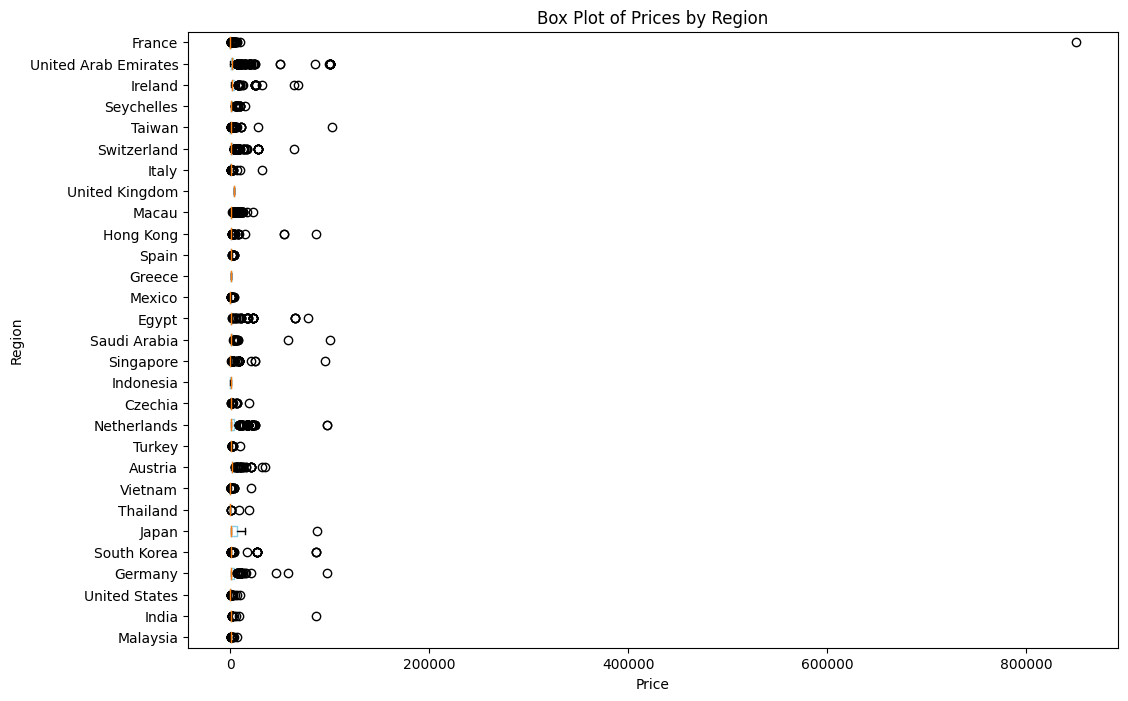

In [ ]:
plt.figure(figsize=(12, 8))
plt.boxplot([group['pricing/rate/amount'] for name, group in df.groupby('country')],
            labels=df['country'].unique(),
            vert=False,
            boxprops=dict(color='skyblue'))
plt.xlabel('Price')
plt.ylabel('Region')
plt.title('Box Plot of Prices by Region')
plt.show()

In order to make the graph more clearly to read, the outlier(s) should be identifies and removed.

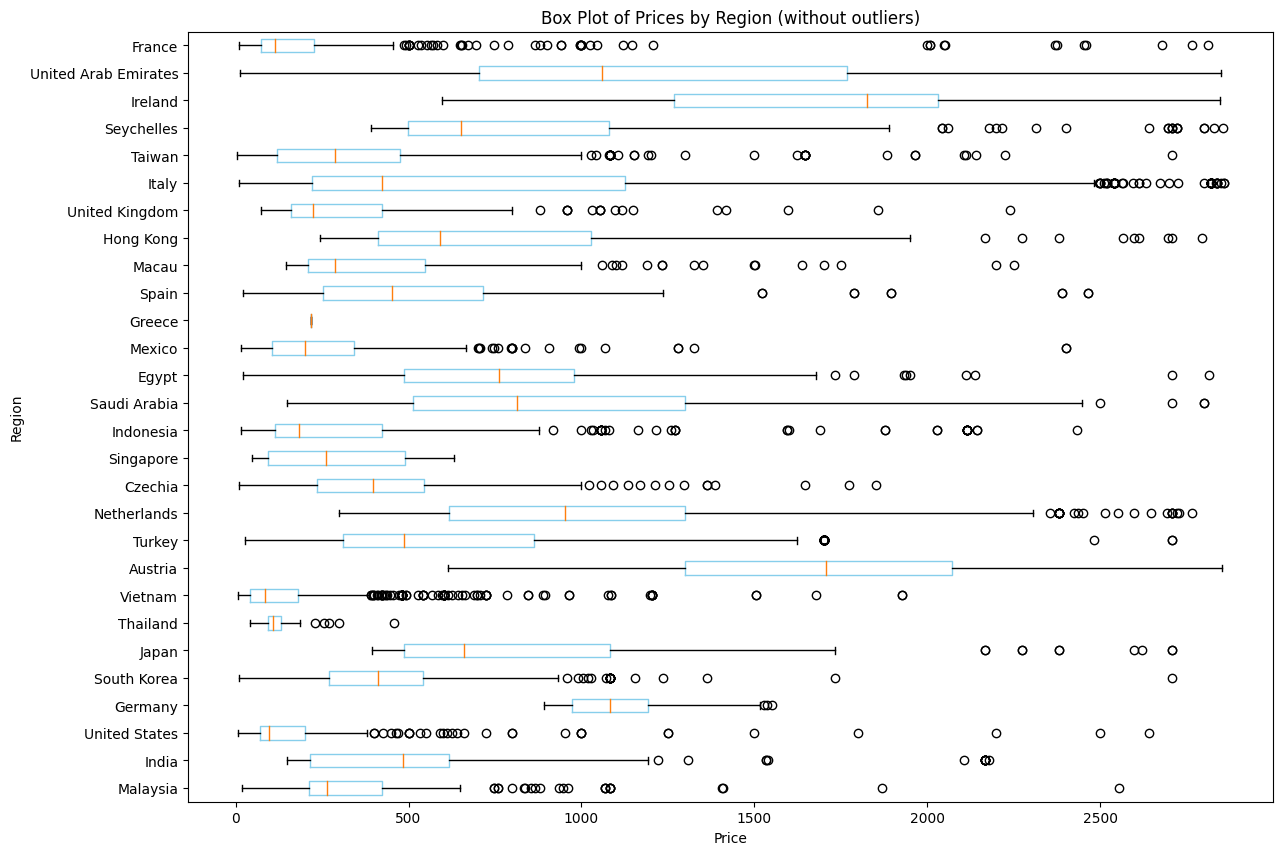

In [ ]:
def drop_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]

# Drop outliers
df_no_outliers = drop_outliers(df, 'pricing/rate/amount')

# Create a box plot without outliers
plt.figure(figsize=(14, 10))  # Adjust the figure size
plt.boxplot([group['pricing/rate/amount'] for name, group in df_no_outliers.groupby('country')],
            labels=df_no_outliers['country'].unique(),
            vert=False,
            boxprops=dict(color='skyblue'))
plt.xlabel('Price')
plt.ylabel('Region')
plt.title('Box Plot of Prices by Region (without outliers)')
plt.show()

### 5.6 Stars of cities worldwide on map

In [ ]:
#pip install geopandas descartes
#pip install geopandas shapely matplotlib

import geopandas as gpd
import matplotlib.pyplot as plt

# Group by city and calculate the average rating
average_ratings = df.groupby('city')['stars'].mean().reset_index()

# Load the world cities GeoDataFrame from geopandas
world_cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

# Merge the city ratings with the world cities GeoDataFrame
merged_geo_df = pd.merge(average_ratings,world_cities, left_on='city', right_on='name', how='inner')

geo_df= merged_geo_df.drop('name', axis=1)
geo_df.head()

<ipython-input-21-a4f8e4c7f527>:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))


,city,stars,geometry
0,Amsterdam,4.829438,POINT (4.91469 52.35191)
1,Athens,4.955000,POINT (23.73138 37.98527)
2,Bangkok,4.778642,POINT (100.51470 13.75195)
3,Berlin,4.802453,POINT (13.39960 52.52376)
4,Cairo,4.788000,POINT (31.24802 30.05191)


<ipython-input-22-49c7c9763703>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-22-49c7c9763703>:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


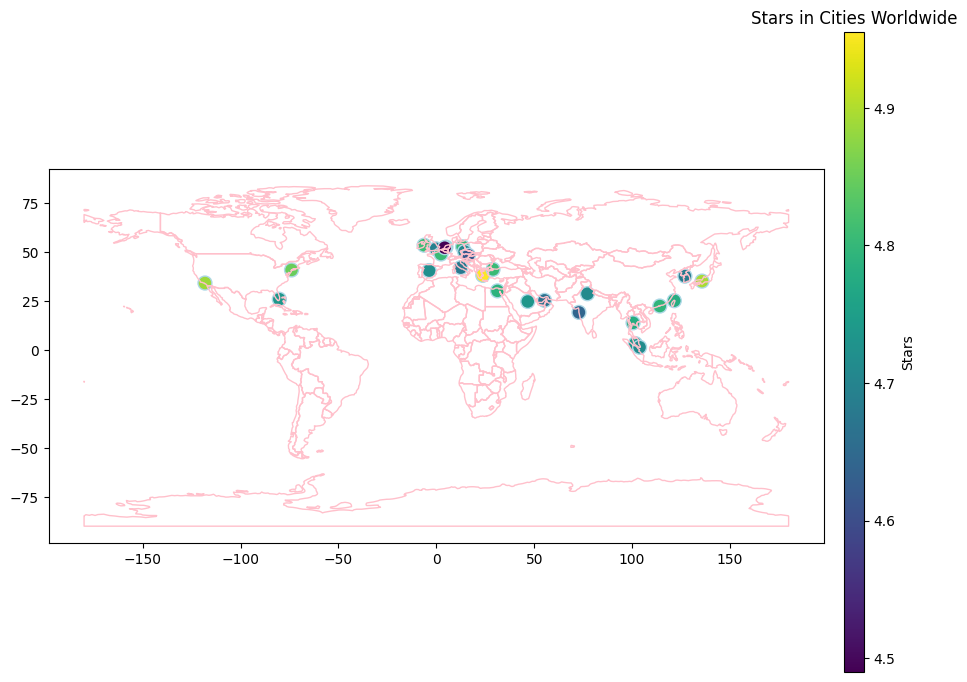

In [ ]:
geo_df= geo_df.set_geometry('geometry')
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map with GeoDataFrame and colorbar
fig, ax = plt.subplots(figsize=(10, 8))

geo_df.plot(ax=ax, column='stars', legend=True, legend_kwds={'label': 'Stars'}, cmap='viridis', cax=plt.axes([0.92, 0.1, 0.02, 0.8]), edgecolor='lightblue', linewidth=1,markersize=100)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.boundary.plot(ax=ax, linewidth=1, color='pink')

plt.title('Stars in Cities Worldwide')
plt.show()


### 5.7 Correlation of amenities and ratings

<ipython-input-23-e4fccaf697df>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_amenity['n'] = df_amenity.sum(axis=1)


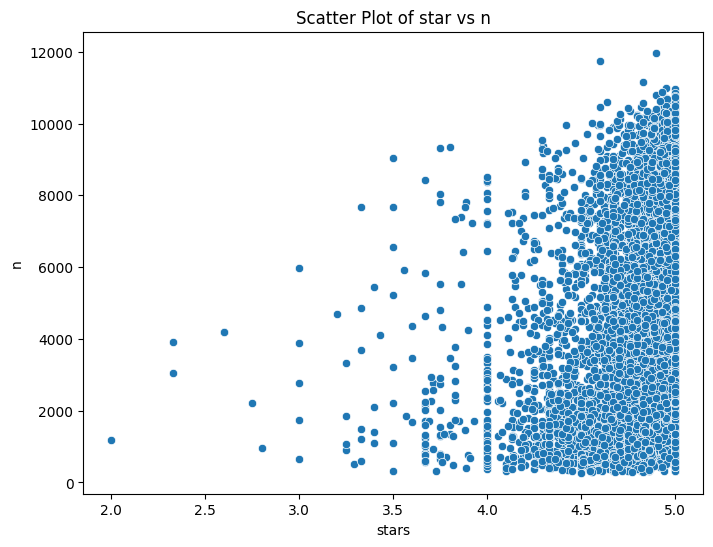

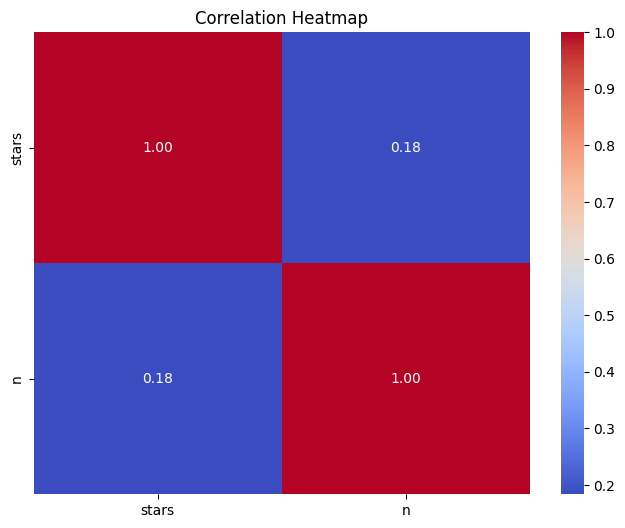

In [ ]:
import seaborn as sns

df_amenity = df.iloc[:, 20:]
df_amenity['n'] = df_amenity.sum(axis=1)
df_cor = pd.concat([df['stars'], df_amenity['n']], axis=1)

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='stars', y='n', data=df_cor)
plt.title('Scatter Plot of star vs n')
plt.show()

# Heatmap of correlation
plt.figure(figsize=(8, 6))
sns.heatmap(df_cor.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

No significant correlation showed.